In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from dynascale.utils.lds import plot
from dynascale.challenges.lds import LDSChallenge
import numpy as np
import scipy as sp
from dynascale.baselines.koopman import Koopman
from functools import partial

2023-05-14 06:43:52.962623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0.9973529536559751
True
131.45978821694084


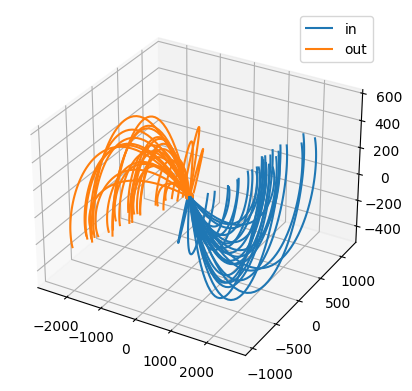

In [6]:
challenge = LDSChallenge(50, 100)
x0 = challenge.make_init_conds(5000)
y0 = challenge.make_init_conds(30, in_dist=False)
x = challenge.make_data(x0, timesteps=50)
y = challenge.make_data(y0, timesteps=50)
plot([x, y], target_dim=3, labels=["in", "out"], max_lines=30)

print(np.linalg.norm(challenge.C, 2))
print(np.all(np.linalg.eigvals(challenge.A) < 0))
print(np.linalg.norm(challenge.A, 2))

In [17]:
model = Koopman(50, 100, 50)
model.fit(x, model_epochs=100)

157/157 [==============================] - 25s 160ms/step - loss: 48951.1875 - reconstruction_loss: 13765.8105 - state_prediction_loss: 416880.4062 - linear_dynamics_loss: 44634.8398 - infinity_norm: 500.4559


In [18]:
x_pred = model.predict(x[:, 0], 50)
y_pred = model.predict(y[:, 0], 50)
plot([x_pred, x], target_dim=2, labels=["x_pred", "x"])

ValueError: Data cardinality is ambiguous:
  x sizes: 5000, 1
Make sure all arrays contain the same number of samples.

In [7]:
time = np.linspace(0, 1, num=100)
dt = time[1] - time[0]
exp_A = sp.linalg.expm(challenge.A * dt)
print(np.all(np.linalg.eigvals(exp_A) < 1))

True


In [8]:
print(np.linalg.norm(exp_A, 2))

1.8251057550825356
